In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_excel('Data Regarding Fever Patients Responses.xlsx')
data

,Timestamp,Name of your college(From where the data is collected),Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,...,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,2019-12-24 09:03:04.333,Hunter College,Swine Flu,21-30,Female,No,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,...,Default,No,No,Yes,No,Yes,No,Yes,No,Not Bleeding
1,2019-12-24 21:04:12.658,Cmoshmc,Typhoid,<10,Male,No,Normal,Continuous,High,Medium,...,Default,No,No,No,No,No,No,Yes,Yes,Not Bleeding
2,2019-12-25 11:07:18.544,Rajshahi medical college,Typhoid,11-20,Male,No,Low BP,Including Intervel,Medium,Medium,...,Default,Yes,Yes,No,No,No,No,Yes,No,Not Bleeding
3,2019-12-25 11:10:47.015,Rajshahi medical college,Dengue,21-30,Male,No,Low BP,High Chills,High,High,...,High,No,Yes,No,No,No,Yes,Yes,Yes,Not Bleeding
4,2019-12-25 14:38:45.052,cmoshmc,Typhoid,21-30,Female,No,Normal,Continuous,Low,Not Having Headche,...,Default,No,No,No,No,No,No,Yes,No,Not Bleeding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2020-01-06 19:36:27.762,Dhaka Shishu Hospital,Dengue,11-20,Male,No,Normal,"Continuous, Shaking Chills",High,Medium,...,Default,No,Yes,Yes,No,No,Yes,Yes,No,Not Bleeding
154,2020-01-06 19:37:07.672,Dhaka shishu hospital,Typhoid,<10,Female,No,Normal,"Continuous, Including Intervel, Shaking Chills",High,High,...,Default,No,Yes,No,No,No,No,Yes,Yes,Not Bleeding
155,2020-01-06 19:38:36.958,Dhaka Shishu Hospital,Malaria,11-20,Female,No,Normal,"Continuous, Including Intervel, Shaking Chills",High,High,...,Default,No,Yes,No,Yes,No,No,Yes,Yes,Not Bleeding
156,2020-01-07 00:16:49.927,"সিলেট উইমেন্স মেডিকেল কলে, সিলেট",Dengue,21-30,Male,No,Normal,Shaking Chills,High,Medium,...,Default,No,No,No,No,No,Yes,Yes,No,Not Bleeding


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data=data.drop(columns=['Timestamp','Name of your college(From where the data is collected)'])
data.head()

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,Swine Flu,21-30,Female,No,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,Medium,Medium,High,Medium,Medium,No,No,No Sign of Abdominal Pain,High,High,High,No Diarrhea,Default,No,No,Yes,No,Yes,No,Yes,No,Not Bleeding
1,Typhoid,<10,Male,No,Normal,Continuous,High,Medium,Medium,Not having Muscle Pain,Medium,Medium,Low,No,No,No Sign of Abdominal Pain,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,Yes,Not Bleeding
2,Typhoid,11-20,Male,No,Low BP,Including Intervel,Medium,Medium,Not having Joint Pain,Medium,Medium,Low,Low,No,No,Medium,Medium,No Stuffy Nose,No Cough,Medium,Default,Yes,Yes,No,No,No,No,Yes,No,Not Bleeding
3,Dengue,21-30,Male,No,Low BP,High Chills,High,High,High,High,Medium,Medium,Medium,No,No,Medium,High,No Stuffy Nose,No Cough,No Diarrhea,High,No,Yes,No,No,No,Yes,Yes,Yes,Not Bleeding
4,Typhoid,21-30,Female,No,Normal,Continuous,Low,Not Having Headche,Not having Joint Pain,Not having Muscle Pain,Medium,Medium,Medium,No,No,Low,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,No,Not Bleeding


In [5]:
c=0
for index,rows in data.iterrows():
    if rows['Symptoms of']=='Chikungunya':
        c=c+1
print(c)

data.shape

16


(158, 30)

In [6]:
data['Age of Patient']=data['Age of Patient'].map({ "<10":1,"11-20":2,"21-30":3,"31-40":4,"41-50":5,">50":6})
data.head()

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,Swine Flu,3,Female,No,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,Medium,Medium,High,Medium,Medium,No,No,No Sign of Abdominal Pain,High,High,High,No Diarrhea,Default,No,No,Yes,No,Yes,No,Yes,No,Not Bleeding
1,Typhoid,1,Male,No,Normal,Continuous,High,Medium,Medium,Not having Muscle Pain,Medium,Medium,Low,No,No,No Sign of Abdominal Pain,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,Yes,Not Bleeding
2,Typhoid,2,Male,No,Low BP,Including Intervel,Medium,Medium,Not having Joint Pain,Medium,Medium,Low,Low,No,No,Medium,Medium,No Stuffy Nose,No Cough,Medium,Default,Yes,Yes,No,No,No,No,Yes,No,Not Bleeding
3,Dengue,3,Male,No,Low BP,High Chills,High,High,High,High,Medium,Medium,Medium,No,No,Medium,High,No Stuffy Nose,No Cough,No Diarrhea,High,No,Yes,No,No,No,Yes,Yes,Yes,Not Bleeding
4,Typhoid,3,Female,No,Normal,Continuous,Low,Not Having Headche,Not having Joint Pain,Not having Muscle Pain,Medium,Medium,Medium,No,No,Low,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,No,Not Bleeding


In [7]:
data['Gender']=data['Gender'].map({'Male':1,"Female":2})
data.head()

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,Swine Flu,3,2,No,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,Medium,Medium,High,Medium,Medium,No,No,No Sign of Abdominal Pain,High,High,High,No Diarrhea,Default,No,No,Yes,No,Yes,No,Yes,No,Not Bleeding
1,Typhoid,1,1,No,Normal,Continuous,High,Medium,Medium,Not having Muscle Pain,Medium,Medium,Low,No,No,No Sign of Abdominal Pain,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,Yes,Not Bleeding
2,Typhoid,2,1,No,Low BP,Including Intervel,Medium,Medium,Not having Joint Pain,Medium,Medium,Low,Low,No,No,Medium,Medium,No Stuffy Nose,No Cough,Medium,Default,Yes,Yes,No,No,No,No,Yes,No,Not Bleeding
3,Dengue,3,1,No,Low BP,High Chills,High,High,High,High,Medium,Medium,Medium,No,No,Medium,High,No Stuffy Nose,No Cough,No Diarrhea,High,No,Yes,No,No,No,Yes,Yes,Yes,Not Bleeding
4,Typhoid,3,2,No,Normal,Continuous,Low,Not Having Headche,Not having Joint Pain,Not having Muscle Pain,Medium,Medium,Medium,No,No,Low,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,No,Not Bleeding


In [8]:
data['Symptoms of']=data['Symptoms of'].map({'Dengue':1,'Malaria':2,'Typhoid':3,
                                             'Swine Flu':4,'Yellow Fever':6,'Chikungunya':7})
data.head()

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,4,3,2,No,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,Medium,Medium,High,Medium,Medium,No,No,No Sign of Abdominal Pain,High,High,High,No Diarrhea,Default,No,No,Yes,No,Yes,No,Yes,No,Not Bleeding
1,3,1,1,No,Normal,Continuous,High,Medium,Medium,Not having Muscle Pain,Medium,Medium,Low,No,No,No Sign of Abdominal Pain,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,Yes,Not Bleeding
2,3,2,1,No,Low BP,Including Intervel,Medium,Medium,Not having Joint Pain,Medium,Medium,Low,Low,No,No,Medium,Medium,No Stuffy Nose,No Cough,Medium,Default,Yes,Yes,No,No,No,No,Yes,No,Not Bleeding
3,1,3,1,No,Low BP,High Chills,High,High,High,High,Medium,Medium,Medium,No,No,Medium,High,No Stuffy Nose,No Cough,No Diarrhea,High,No,Yes,No,No,No,Yes,Yes,Yes,Not Bleeding
4,3,3,2,No,Normal,Continuous,Low,Not Having Headche,Not having Joint Pain,Not having Muscle Pain,Medium,Medium,Medium,No,No,Low,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,No,No,No,No,No,No,Yes,No,Not Bleeding


In [9]:
def mapping(ftr):
    data[ftr] = data[ftr].map({'Yes':1,'No':2 ,'Don\'t know':3})
    
feature=['Patient Had Diabetes?','Constipation','Dizziness','Sore Throat','Chest Congestion',
         'Sensitivity to Light','Insomnia','Pain in the Eyes','Poor Appetite','Convulsions','Back Pain']

for x in feature:
    mapping(x)
    
data.head()

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,4,3,2,2.0,Normal,"Continuous, Including Intervel, Shaking Chills",Medium,High,Medium,Medium,High,Medium,Medium,2,2,No Sign of Abdominal Pain,High,High,High,No Diarrhea,Default,2,2,1,2,1,2,1,2,Not Bleeding
1,3,1,1,2.0,Normal,Continuous,High,Medium,Medium,Not having Muscle Pain,Medium,Medium,Low,2,2,No Sign of Abdominal Pain,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,2,2,2,2,2,2,1,1,Not Bleeding
2,3,2,1,2.0,Low BP,Including Intervel,Medium,Medium,Not having Joint Pain,Medium,Medium,Low,Low,2,2,Medium,Medium,No Stuffy Nose,No Cough,Medium,Default,1,1,2,2,2,2,1,2,Not Bleeding
3,1,3,1,2.0,Low BP,High Chills,High,High,High,High,Medium,Medium,Medium,2,2,Medium,High,No Stuffy Nose,No Cough,No Diarrhea,High,2,1,2,2,2,1,1,1,Not Bleeding
4,3,3,2,2.0,Normal,Continuous,Low,Not Having Headche,Not having Joint Pain,Not having Muscle Pain,Medium,Medium,Medium,2,2,Low,No Rash,No Stuffy Nose,No Cough,No Diarrhea,Default,2,2,2,2,2,2,1,2,Not Bleeding


In [10]:
data['Condition of Blood Pressure']=data['Condition of Blood Pressure'].map({'Low BP':1,"Normal":2,"High BP":3})

In [11]:
data['Fever Type.1']=data['Fever Type.1'].map({'Low':1,"Medium":2,"High":3})

In [12]:
data['Headache']=data['Headache'].map({'Not Having Headache':1,"Medium":2,"High":3})

In [13]:
data['Joint Pain']=data['Joint Pain'].map({'Not having Joint Pain':1,"Medium":2,"High":3})

In [14]:
data['Muscle Pain']=data['Muscle Pain'].map({'Not having Muscle Pain':1,"Medium":2,"High":3})

In [15]:
data['Diarrhea']=data['Diarrhea'].map({'No Diarrhea':1,"Medium":2,"High":3})


In [16]:
data['Fatigue (Tiredness)']=data['Fatigue (Tiredness)'].map({'No Fatigue':1,"Low":2,"Medium":3,"High":4})

In [17]:
data['Nausea']=data['Nausea'].map({'Not Feeling Nausea':1,"Low":2,"Medium":3,"High":4})


In [18]:
data['Vomiting']=data['Vomiting'].map({'No Vomiting':1,"Low":2,"Medium":3,"High":4})


In [19]:
data['Abdominal Pain']=data['Abdominal Pain'].map({'No Sign of Abdominal Pain':1,"Low":2,"Medium":3,"High":4})

In [20]:
data['Skin Rash']=data['Skin Rash'].map({'No Rash':1,"Low":2,"Medium":3,"High":4})

In [21]:
data['Stuffy / Runny Nose']=data['Stuffy / Runny Nose'].map({'No Stuffy Nose':1,"Low":2,"Medium":3,"High":4})

In [22]:
data['Cough']=data['Cough'].map({'No Cough':1,"Low":2,"Medium":3,"High":4})

In [23]:
data['Sweating']=data['Sweating'].map({'Default':1,"Medium":2,"High":3})

In [24]:
data

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,4,3,2,2.0,2,"Continuous, Including Intervel, Shaking Chills",2,3.0,2.0,2.0,4,3,3,2,2,1,4,4,4,1.0,1,2,2,1,2,1,2,1,2,Not Bleeding
1,3,1,1,2.0,2,Continuous,3,2.0,2.0,1.0,3,3,2,2,2,1,1,1,1,1.0,1,2,2,2,2,2,2,1,1,Not Bleeding
2,3,2,1,2.0,1,Including Intervel,2,2.0,1.0,2.0,3,2,2,2,2,3,3,1,1,2.0,1,1,1,2,2,2,2,1,2,Not Bleeding
3,1,3,1,2.0,1,High Chills,3,3.0,3.0,3.0,3,3,3,2,2,3,4,1,1,1.0,3,2,1,2,2,2,1,1,1,Not Bleeding
4,3,3,2,2.0,2,Continuous,1,NaN,1.0,1.0,3,3,3,2,2,2,1,1,1,1.0,1,2,2,2,2,2,2,1,2,Not Bleeding
5,1,4,2,2.0,1,Continuous,1,3.0,3.0,3.0,4,4,1,2,2,1,3,1,1,1.0,1,2,2,2,2,2,1,1,2,Not Bleeding
6,3,1,2,2.0,2,Continuous,3,NaN,1.0,1.0,1,1,3,2,2,3,1,1,1,1.0,1,2,2,2,2,2,2,2,2,Not Bleeding
7,1,3,1,2.0,3,Shaking Chills,3,3.0,3.0,2.0,4,3,2,2,2,3,4,1,1,1.0,2,2,2,1,2,2,1,1,2,Bleeding Gums
8,2,3,2,2.0,3,Including Intervel,3,3.0,NaN,NaN,4,1,1,2,2,3,1,1,1,1.0,3,2,1,2,1,2,2,1,1,Not Bleeding
9,3,2,1,2.0,2,Continuous,3,3.0,3.0,NaN,4,2,2,2,2,1,1,1,3,1.0,3,2,2,2,2,2,2,1,1,Not Bleeding


In [25]:
for x in data['Bleeding']:
    print(x)

Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Bleeding Gums
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Vaginal
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Bleeding Gums
Bleeding Gums, Bloody Stools
Not Bleeding
Nose Bleed
Not Bleeding
Not Bleeding
Rectal Bleeding
Not Bleeding
Not Bleeding
Intestinal Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Bloody Stools
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Nose Bleed
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Nose Bleed, Bleeding Gums, Bloody Stools, Intestinal Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Including all the site
Intestinal Bleeding
Not Bleeding
Not Bleeding
Bleeding Gums
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Not Bleeding
Bleeding Gums
Not Bleeding
No

In [26]:
data['Fever Type']

0      Continuous, Including Intervel, Shaking Chills
1                                          Continuous
2                                  Including Intervel
3                                         High Chills
4                                          Continuous
5                                          Continuous
6                                          Continuous
7                                      Shaking Chills
8                                  Including Intervel
9                                          Continuous
10                                     Shaking Chills
11                                     Shaking Chills
12                                 Including Intervel
13                                         Continuous
14                                         Continuous
15     Continuous, Including Intervel, Shaking Chills
16                         Continuous, Shaking Chills
17                         Continuous, Shaking Chills
18                          

In [27]:
data['Fever Type']=data['Fever Type'].map({'Continuous':1,"Including Intervel":2,"Shaking Chills":3,"High Chills":4
                                          , 'Continuous, Including Intervel, Shaking Chills':5,
                                          ' Continuous, Shaking Chills':6,
                                           'Continuous, High Chills':7,
                                           'Including Intervel, Shaking Chills':8,
                                           'Including Intervel, High Chills':9,
                                           'Continuous, Including Intervel':10,
                                           
                                          })

In [28]:
data['Bleeding']=data['Bleeding'].map({'Not Bleeding':1,
                                       "Nose Bleed":2,
                                       "Bleeding Gums":3,
                                       "Intestinal Bleeding":4,
                                       "Nose Bleed, Bleeding Gums, Bloody Stools, Intestinal Bleeding":5,
                                       "Nose Bleed, Bleeding Gums, Bloody Stools":6,
                                       "Nose Bleed, Bleeding Gums, Intestinal Bleeding":7,
                                       "Nose Bleed, Bleeding Gums":8,
                                       "Nose Bleed, Bloody Stools":9,
                                       "Bloody Stools, Intestinal Bleeding":10,
                                       "Including all the site":11,
                                       "Rectal Bleeding":12,
                                       "Bloody Stools":13,
                                       "Bleeding Gums, Bloody Stools":14,
                                       "Vaginal":15
                                      })

In [29]:
data

,Symptoms of,Age of Patient,Gender,Patient Had Diabetes?,Condition of Blood Pressure,Fever Type,Fever Type.1,Headache,Joint Pain,Muscle Pain,Fatigue (Tiredness),Nausea,Vomiting,Sensitivity to Light,Insomnia,Abdominal Pain,Skin Rash,Stuffy / Runny Nose,Cough,Diarrhea,Sweating,Constipation,Dizziness,Sore Throat,Back Pain,Chest Congestion,Pain in the Eyes,Poor Appetite,Convulsions,Bleeding
0,4,3,2,2.0,2,5.0,2,3.0,2.0,2.0,4,3,3,2,2,1,4,4,4,1.0,1,2,2,1,2,1,2,1,2,1
1,3,1,1,2.0,2,1.0,3,2.0,2.0,1.0,3,3,2,2,2,1,1,1,1,1.0,1,2,2,2,2,2,2,1,1,1
2,3,2,1,2.0,1,2.0,2,2.0,1.0,2.0,3,2,2,2,2,3,3,1,1,2.0,1,1,1,2,2,2,2,1,2,1
3,1,3,1,2.0,1,4.0,3,3.0,3.0,3.0,3,3,3,2,2,3,4,1,1,1.0,3,2,1,2,2,2,1,1,1,1
4,3,3,2,2.0,2,1.0,1,NaN,1.0,1.0,3,3,3,2,2,2,1,1,1,1.0,1,2,2,2,2,2,2,1,2,1
5,1,4,2,2.0,1,1.0,1,3.0,3.0,3.0,4,4,1,2,2,1,3,1,1,1.0,1,2,2,2,2,2,1,1,2,1
6,3,1,2,2.0,2,1.0,3,NaN,1.0,1.0,1,1,3,2,2,3,1,1,1,1.0,1,2,2,2,2,2,2,2,2,1
7,1,3,1,2.0,3,3.0,3,3.0,3.0,2.0,4,3,2,2,2,3,4,1,1,1.0,2,2,2,1,2,2,1,1,2,3
8,2,3,2,2.0,3,2.0,3,3.0,NaN,NaN,4,1,1,2,2,3,1,1,1,1.0,3,2,1,2,1,2,2,1,1,1
9,3,2,1,2.0,2,1.0,3,3.0,3.0,NaN,4,2,2,2,2,1,1,1,3,1.0,3,2,2,2,2,2,2,1,1,1


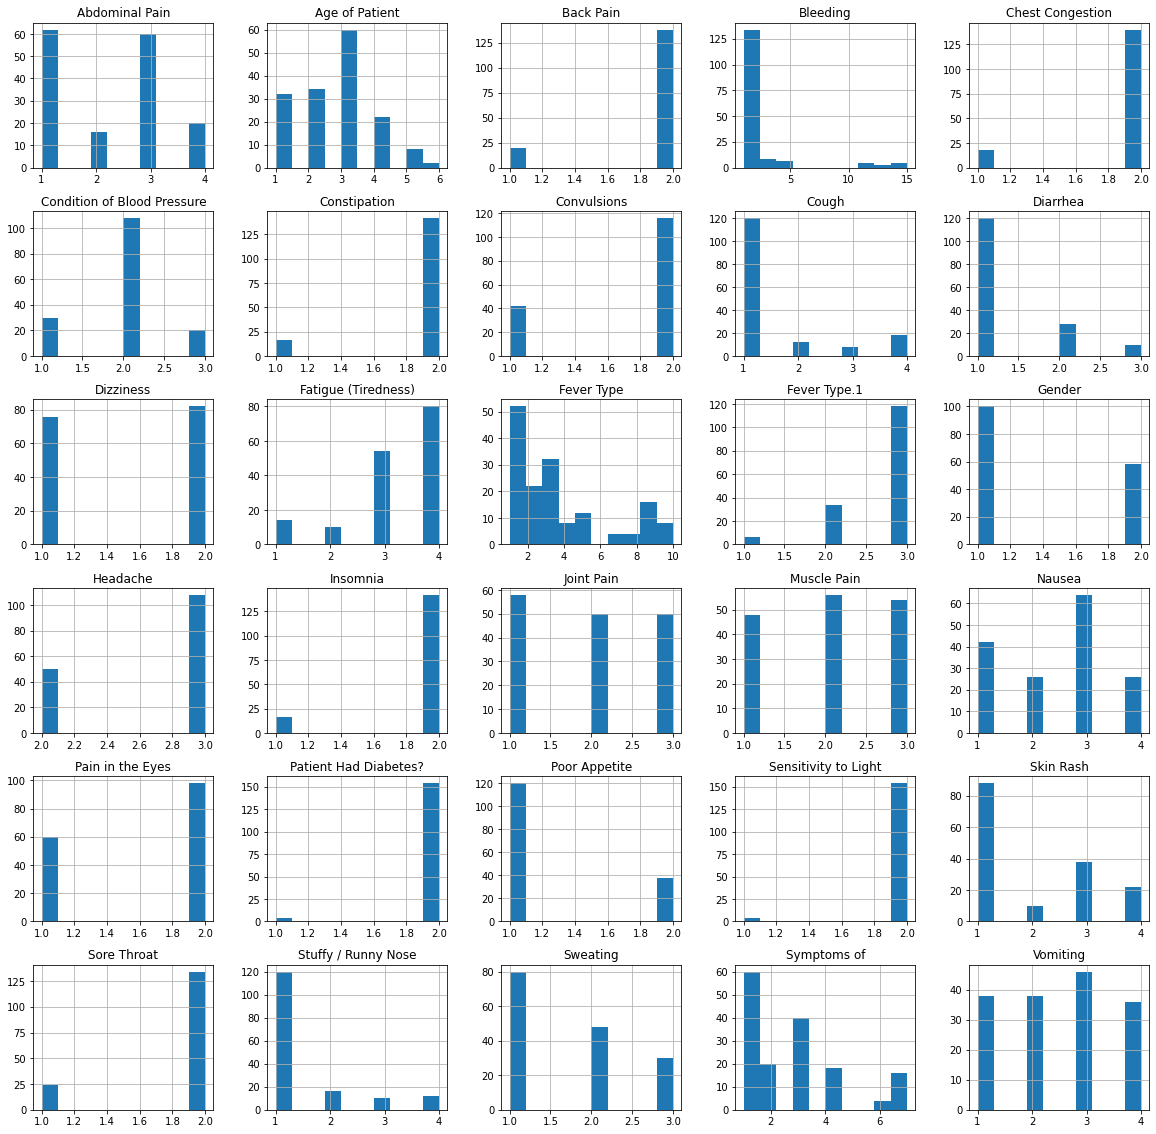

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(20,20))
plt.show()

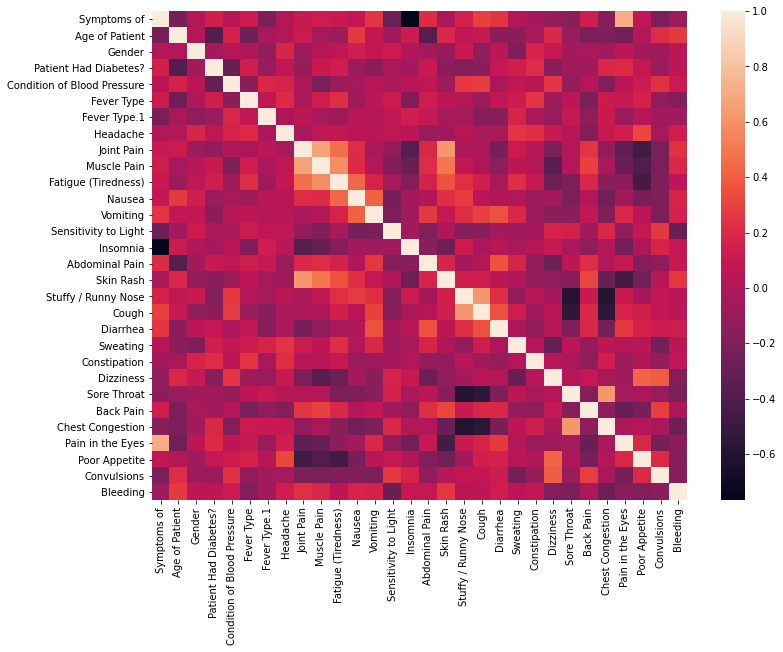

In [57]:
cormat= data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(cormat,vmax=1)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X=['Age of Patient','Gender','Patient Had Diabetes?','Condition of Blood Pressure','Fever Type','Fever Type.1',
    'Headache','Joint Pain','Muscle Pain','Fatigue (Tiredness)','Nausea','Vomiting','Abdominal Pain','Skin Rash'
   ,'Stuffy / Runny Nose','Cough','Diarrhea','Sweating','Constipation','Dizziness','Sore Throat','Chest Congestion',
   'Pain in the Eyes', 'Poor Appetite','Convulsions','Back Pain','Insomnia','Sensitivity to Light']
y=['Symptoms of']

data[X]=data[X].fillna(method='ffill')



X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], random_state=0)

print(X_train,y_train)

     Age of Patient  Gender  Patient Had Diabetes?  \
27                4       2                    2.0   
111               2       1                    2.0   
110               4       1                    2.0   
85                1       2                    2.0   
18                2       2                    2.0   
62                3       1                    2.0   
30                3       2                    2.0   
71                1       2                    2.0   
61                3       1                    2.0   
2                 2       1                    2.0   
147               1       2                    2.0   
43                2       1                    2.0   
155               2       2                    2.0   
10                2       2                    2.0   
86                3       1                    2.0   
131               1       1                    2.0   
152               1       1                    2.0   
145               1       2 

In [46]:
from sklearn import svm


svm_clf = svm.SVC(kernel='rbf')

svm_clf.fit(X_train,y_train)
print(svm_clf.score(X_test,y_test)*100)




X_new=[[1,1,2,1,1,1,1,
    1,1,1,1,2,1,1,1
   ,1,1,2,1,1,1,1,
   1,1,1,2,1,2]]

y_new=svm_clf.predict(X_new)
print(y_new)



cv_scores = cross_val_score(svm_clf, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

82.5
[3]
Cross-validation scores (3-fold): [0.86792453 0.86792453 0.94230769]
Mean cross-validation score (3-fold): 0.893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


cv_scores = cross_val_score(knn, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

0.7
Cross-validation scores (3-fold): [0.83018868 0.83018868 0.92307692]
Mean cross-validation score (3-fold): 0.861


<ipython-input-47-ea3a788dd1a0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

print(dt.score(X_test,y_test))

cv_scores = cross_val_score(dt, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

0.825
Cross-validation scores (3-fold): [0.86792453 0.8490566  0.86538462]
Mean cross-validation score (3-fold): 0.861


In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test,y_test))

cv_scores = cross_val_score(lr, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

0.95
Cross-validation scores (3-fold): [1. 1. 1.]
Mean cross-validation score (3-fold): 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

In [53]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
    
gnb.fit(X_train,y_train)

print(gnb.score(X_test,y_test))

cv_scores = cross_val_score(gnb, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

0.95
Cross-validation scores (3-fold): [1. 1. 1.]
Mean cross-validation score (3-fold): 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [54]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(max_depth=3, random_state=0)

rnd_clf.fit(X_train,y_train)

print(rnd_clf.score(X_test,y_test))

cv_scores = cross_val_score(rnd_clf, data[X], data[y],cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))


<ipython-input-54-0f8f3753b5ca>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Cross-validation scores (3-fold): [0.98113208 0.96226415 0.98076923]
Mean cross-validation score (3-fold): 0.975


In [33]:
filename = 'model.pkl'
pickle.dump(svm_clf, open(filename, 'wb'))